# 1. Loading data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Firstly we load the data and filter the columns.

In [2]:
df = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/Moriartyred.csv",
                  usecols=["UUID","ActionType"])

df2 = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/T4.csv", 
                  usecols=["UUID", "Total_CPU", "Traffic_TotalTxBytes", "processes", "MemFree", "SwapFree"])

## 1.2. Merging the two datasets.

The first thing we need to do it is to convert column 'UUID' (which is a timestamp in milliseconds) into a date timestamp.

In [3]:
df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('t')


df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('t')

Merge the two datasheets on the column to set the desired combinations.

In [4]:
data = pd.merge(df,df2, on=['UUID'])

## 1.3. Replace ActionType.

We need numeric values in the columns, so we replace ActionType malicious/benign by 1/0 respectively. And finally we don't need column 'UUID' for the predicting model so we remove it.

In [5]:
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
data = data.drop('UUID', 1)

# 2. Check correlation of the variables.

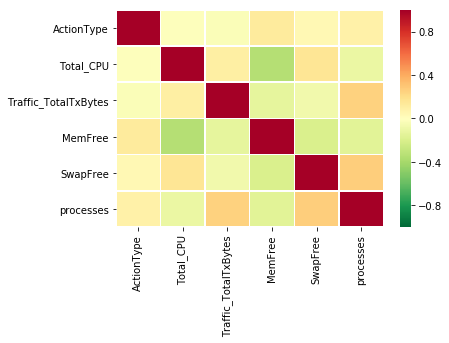

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

corr = data.corr(method='pearson')
sn.heatmap(corr, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, linewidths=0.5)


plt.show()

The  'ActionType'  value is the value  'y'  that will be used in the train. So we save this value on variable y and then, we drop this column from the datasheet  'data'.

In [7]:
y = data['ActionType']
data = data.drop('ActionType', 1)

## 2.1 Scalation.

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

# 3. KNN Classification.

## 3.1 Split data on train data and test data.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datanorm, y, test_size=0.3)

## 3.2 Apply KNN Classification.

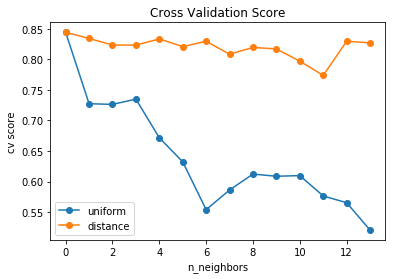

In [11]:
from sklearn import neighbors

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,15):
        
        # Instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train,y_train)
        
        
        # Cross-validation Score
        
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
        total_scores.append(scores.mean())
    
    plt.plot(range(0,len(total_scores)), total_scores, 
             marker='o', label=weights)
    plt.title('Cross Validation Score')
    plt.ylabel('cv score')
    plt.xlabel('n_neighbors')
    plt.legend()